## Preparation

In [1]:
import pandas as pd
import numpy as np
import re
import os
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
#from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,auc,precision_recall_curve,average_precision_score,accuracy_score,f1_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

def clf_select(name,pds=5):
    if name =='DT':
        clf = DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, criterion='gini')
    elif name =='DT_cv':
        tree_para = {'max_depth': [50, 100, 200, 500, 1000]}
        clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'SVM':
        clf = SVC(kernel='linear', probability=True, C=1) #linear
    elif name == 'SVM_cv':
        tree_para = { 'C': [0.01, 0.1, 1, 10,100]}
        clf = GridSearchCV(SVC(kernel= 'rbf',probability=True), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'RF':
        clf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2,n_estimators=1000)
    elif name == 'RF_cv':
        tree_para = {'n_estimators': [10, 50, 100, 200, 500], 'max_depth': [10, 50, 100, 200, 500]}
        clf = GridSearchCV(RandomForestClassifier(), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'LR':
        clf = LogisticRegression(penalty='l2',solver='liblinear',C=1)
    elif name == 'LR_cv':
        tree_para = {'C': [0.001, 0.1, 1, 10, 100]}
        clf = GridSearchCV(LogisticRegression(penalty='l2',solver='liblinear'),tree_para, cv=pds, n_jobs=5,scoring='f1_macro')   
    elif name == 'KNN':
        clf = KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=10)
    elif name == 'KNN_cv':
        tree_para = {'n_neighbors': [5, 10, 20, 50]}
        clf = GridSearchCV(KNeighborsClassifier(weights='distance'), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'NN':
        clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=200)
    elif name == 'LGBoost':
        clf = LGBMClassifier(num_leaves=5, n_estimators=100)
    elif name == 'LGBoost_cv':
        tree_para = {'max_depth': [5, 10, 50, 100, 500, 1000], 'n_estimators': [100, 500, 1000],
                     'num_leaves': [20, 30, 50, 100]}
        clf = GridSearchCV(LGBMClassifier(learning_rate=0.1), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'XGBoost':
        clf = xgb.XGBClassifier(learning_rate=0.5, n_estimators=500, max_depth=50, min_child_weight=3,
                                gamma=1,  # 惩罚项中叶子结点个数前的参数
                                subsample=0.7,  # 随机选择80%样本建立决策树
                                objective='binary:logistic',  # 指定损失函数
                                nthread=5
                                )
    elif name == 'XGBoost_cv':
        tree_para = {'max_depth': [10, 50, 100, 200, 500], 'n_estimators': [50, 100, 200, 500]}
        clf = GridSearchCV(xgb.XGBClassifier(learning_rate=0.5, min_child_weight=3, gamma=3, subsample=0.7,
                                             objective='binary:logistic',
                                             scale_pos_weight=1, nthread=5), tree_para, cv=pds, n_jobs=5,scoring='f1_macro')
    
    elif name == 'ENSEMBLE_hard':
        clf = VotingClassifier(estimators=[('RF',RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2,n_estimators=1000)),
                                           ('SVM',SVC(kernel='linear', probability=True, C=0.8)),
                                           ('LR',LogisticRegression(penalty='l2',solver='liblinear')),
                                           ('DT',DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, criterion='gini'))],voting = 'hard')
    elif name == 'ENSEMBLE_soft':
        clf = VotingClassifier(estimators=[('RF',RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2,n_estimators=1000)),
                                           ('LR',LogisticRegression(penalty='l2',solver='liblinear'))],voting = 'soft')
#     ('SVM',SVC(kernel='linear', probability=True, C=0.8)),
#     ('DT',DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, criterion='gini'))
    return clf

def clf_select_multi(name, pds=5):
    if name == 'DT':
        clf = DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, criterion='gini')
    elif name == 'DT_cv':
        tree_para = {'max_depth': [50, 100, 200, 500, 1000]}
        clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'SVM':
        clf = SVC(kernel='rbf', probability=True, C=1)
    elif name == 'SVM_cv':
        tree_para = {'C': [0.01, 0.1, 1, 10, 100]}
        clf = GridSearchCV(SVC(kernel='rbf', probability=True), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'RF':
        clf = RandomForestClassifier(n_estimators=100, max_depth=100)
    elif name == 'RF_cv':
        tree_para = {'n_estimators': [10, 50, 100, 200, 500], 'max_depth': [10, 50, 100, 200, 500]}
        clf = GridSearchCV(RandomForestClassifier(), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'LR':
        clf = LogisticRegression(penalty='l2', solver='liblinear', C=1)
    elif name == 'LR_cv':
        tree_para = {'C': [0.001, 0.1, 1, 10, 100]}
        clf = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), tree_para, cv=pds, n_jobs=5,scoring='f1_macro')
    elif name == 'KNN':
        clf = KNeighborsClassifier(n_neighbors=10)
    elif name == 'KNN_cv':
        tree_para = {'n_neighbors': [5, 10, 20, 50]}
        clf = GridSearchCV(KNeighborsClassifier(weights='distance'), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'NN':
        clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=200)
    elif name == 'LGBoost':
        clf = LGBMClassifier(num_leaves=5, n_estimators=100)
    elif name == 'LGBoost_cv':
        tree_para = {'max_depth': [5, 10, 50, 100, 500, 1000], 'n_estimators': [100, 500, 1000],
                     'num_leaves': [20, 30, 50, 100]}
        clf = GridSearchCV(LGBMClassifier(learning_rate=0.1), tree_para, cv=pds, n_jobs=5, scoring='f1_macro')
    elif name == 'XGBoost':
        clf = xgb.XGBClassifier(learning_rate=0.5, n_estimators=500, max_depth=50, min_child_weight=3,
                                gamma=1,  # 惩罚项中叶子结点个数前的参数
                                subsample=0.7,  # 随机选择80%样本建立决策树
                                objective='multi:softprob',  # 指定损失函数
                                nthread=5
                                )
    elif name == 'XGBoost_cv':
        tree_para = {'max_depth': [10, 50, 100, 200, 500], 'n_estimators': [50, 100, 200, 500]}
        clf = GridSearchCV(xgb.XGBClassifier(learning_rate=0.5, min_child_weight=3, gamma=3, subsample=0.7,
                                             objective='binary:logistic',
                                             scale_pos_weight=1, nthread=5), tree_para, cv=pds,n_jobs=5, scoring='f1_macro')
    return clf

def plot_AUROC(Y_test,Y_prob,F):
    fpr, tpr, thresholds = roc_curve(Y_test,Y_prob)
    roc_auc = auc(fpr, tpr)
    print('AUROC:',roc_auc)
    # plot ROC curve
    plt.figure(figsize=(4,4))
    plt.plot(fpr, tpr, '-', color='blue', label='RandomForest AUC = {:.4f}'.format(roc_auc), lw=2)
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title('ROC curve of ' + F)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='best',fontsize='small')
    plt.tight_layout()

    plt.savefig('./figure/cellline/' + F + '_AUROC.png',dpi=600)
    #plt.savefig('figure/LR_small_9.png',dpi=600)
    plt.show()
    plt.close()

def plot_AUPRC(Y_test,Y_prob,F):
    precision, recall, thresholds = precision_recall_curve(Y_test,Y_prob)
    aupr = auc(recall,precision)
    print('AUPRC:',aupr)
    # plot ROC curve
    plt.figure(figsize=(4,4))
    plt.plot(recall,precision, '-', color='blue', label='RandomForest AUPRC = {:.4f}'.format(aupr), lw=2)
    plt.plot([0, 1], [1, 0], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title('AUPRC curve of ' + F)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best',fontsize='small')
    plt.tight_layout()

    plt.savefig('./figure/cellline/' + F + '_AUPRC.png',dpi=600)
    #plt.savefig('figure/LR_small_9.png',dpi=600)
    plt.show()
    plt.close()
    
def find_metrics_best_for_shuffle(label, prob, cut_spe=0.95):
    fpr, tpr, _ = roc_curve(label, prob)
    a = 1 - fpr
    b = tpr
    Sensitivity = b
    Specificity = a
    Sensitivity_ = Sensitivity[Specificity >= cut_spe]
    if (len(Sensitivity_) == 1) & (Sensitivity_[0] == 0):
        Sensitivity_best = ((Sensitivity[1] - Sensitivity[0]) / (Specificity[1] - Specificity[0])) * cut_spe + Sensitivity[1] - ((Sensitivity[1] - Sensitivity[0]) / (Specificity[1] - Specificity[0])) * \
                           Specificity[1]
    else:
        Sensitivity_best = np.max(Sensitivity_)

    return Sensitivity_best, Sensitivity, Specificity


def plot_roc_multi(prob, label):
    pre_label = prob.argmax(axis=1)
    acc = accuracy_score(label, pre_label)
    auc_macro_ovr = roc_auc_score(label, prob, average='macro', multi_class='ovr')
    auc_macro_ovo = roc_auc_score(label, prob, average='macro', multi_class='ovo')
    auc_weighted_ovr = roc_auc_score(label, prob, average='weighted', multi_class='ovr')
    auc_weighted_ovo = roc_auc_score(label, prob, average='weighted', multi_class='ovo')
    f1_macro = f1_score(label, pre_label, average='macro')
    f1_weighted = f1_score(label, pre_label, average='weighted')
    return acc, auc_weighted_ovr, auc_weighted_ovo, auc_macro_ovr, auc_macro_ovo, f1_weighted, f1_macro

## Data

In [275]:
HuTD = pd.read_csv('dataset/HuTD.csv')
TakaTD = pd.read_csv('dataset/TakaTD.csv')
newTD = pd.read_csv('dataset/newTD.csv')
HuTD['siRNAPred'] = HuTD['y']
HuTD['siRNAPred_prob'] = HuTD['y']
newTD['siRNAPred'] = newTD['y']
newTD['siRNAPred_prob'] = newTD['y']
TakaTD['siRNAPred'] = TakaTD['y']
TakaTD['siRNAPred_prob'] = TakaTD['y']

In [291]:
Hu_siPred = [i.strip() for i in os.popen('ls dataset/siRNAPred/Hu')]
new_siPred = [i.strip() for i in os.popen('ls dataset/siRNAPred/new')]
Taka_siPred = [i.strip() for i in os.popen('ls dataset/siRNAPred/Taka')]
Hu = pd.read_csv('dataset/Hu.csv')
Hu['siRNAPred'] = Hu['y']
new = pd.read_csv('dataset/new.csv')
new['siRNAPred'] = new['y']
Taka = pd.read_csv('dataset/Taka.csv')
Taka['siRNAPred'] = Taka['y']

merge = pd.DataFrame()
for _index in range(len(Hu_siPred)):
    Hu_tmp1 = pd.read_csv('dataset/siRNAPred/Hu/' + Hu_siPred[_index])
    Hu_tmp1 = pd.concat((Hu_tmp1['SEQUENCE'][1::2].reset_index(drop=True), Hu_tmp1['SCORE'][::2].reset_index(drop=True)),axis=1)
    Hu_tmp1['SEQUENCE'] = [i.split('--')[0].split("3'")[1][:19][::-1].upper() for i in Hu_tmp1['SEQUENCE']]
    merge = pd.concat((merge, Hu_tmp1))


SP_taka = pd.DataFrame()
for _index in range(len(Taka_siPred)):
    Taka_tmp1 = pd.read_csv('dataset/siRNAPred/Taka/' + Taka_siPred[_index])
    Taka_tmp1 = pd.concat((Taka_tmp1['SEQUENCE'][1::2].reset_index(drop=True), Taka_tmp1['SCORE'][::2].reset_index(drop=True)),axis=1)
    Taka_tmp1['SEQUENCE'] = [i.split('--')[0].split("3'")[1][:19][::-1].upper() for i in Taka_tmp1['SEQUENCE']]
    SP_taka = pd.concat((SP_taka, Taka_tmp1))

SP_new = pd.DataFrame()
for _index in range(len(new_siPred)):
    new_tmp1 = pd.read_csv('dataset/siRNAPred/new/' + new_siPred[_index])
    new_tmp1 = pd.concat((new_tmp1['SEQUENCE'][1::2].reset_index(drop=True), new_tmp1['SCORE'][::2].reset_index(drop=True)),axis=1)
    new_tmp1['SEQUENCE'] = [i.split('--')[0].split("3'")[1][:19][::-1].upper() for i in new_tmp1['SEQUENCE']]
    SP_new = pd.concat((SP_new, new_tmp1))


## Calculation

### siRNAPred-Huesken


In [293]:
for i in range(HuTD.shape[0]):
    if i % 500 == 0:
        print(i)
    if len(merge[merge['SEQUENCE'] == HuTD.iloc[i,0]]['SCORE']) == 0:
        HuTD.iloc[i,-2] = 0
        HuTD.iloc[i,-1] = 0
        print(i)
    else:
        HuTD.iloc[i,-2] = int(merge[merge['SEQUENCE'] == HuTD.iloc[i,0]]['SCORE'].values[0] >= 0.7)
        HuTD.iloc[i,-1] = merge[merge['SEQUENCE'] == HuTD.iloc[i,0]]['SCORE'].values[0]

0
202
357
500
560
1000
1121
1500
1899
2000
2306


F1 0.6096695902991378
0.6039387308533917
0.6639175257731958
0.6096491228070176
0.6208425720620843
0.5499999999999999
AUC 0.668079216548727
0.6650345622119815
0.6948039056436913
0.6690679185552917
0.6864047687446136
0.6250849275880566
PRC 0.6580016744510392 0.03244156211911413
0.6290123911037292
0.7039449735380696
0.636726690163923
0.6905689765674503
0.6297553408820233


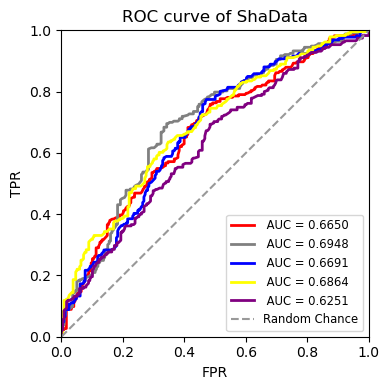

In [294]:
from sklearn.utils import shuffle
import pickle

def get_kfold_data_2(i, datasets, k=5, v=1):
    datasets = shuffle_dataset(datasets, 42).reset_index(drop=True)
    v = v * 10
    if k<5:
        fold_size = len(datasets) // 5
    else:
        fold_size = len(datasets) // k

    test_start = i * fold_size

    if i != k - 1 and i != 0:
        test_end = (i + 1) * fold_size
        TestSet = datasets[test_start:test_end]
        TrainSet = pd.concat([datasets[0:test_start], datasets[test_end:]])

    elif i == 0:
        test_end = fold_size
        TestSet = datasets[test_start:test_end]
        TrainSet = datasets[test_end:]

    else:
        TestSet = datasets[test_start:]
        TrainSet = datasets[0:test_start]

    return TrainSet.reset_index(drop=True), TestSet.reset_index(drop=True)

def shuffle_dataset(dataset, seed):
    np.random.seed(seed)
    dataset = shuffle(dataset)
    return dataset

kfold = 5
ACCU,SENS,PREC,F1 = [],[],[],[]
FPR = []
TPR = []
ROC_AUC = []
ROC_PRC = []
for i_fold in range(kfold):
    train_df, valid_df = get_kfold_data_2(i_fold, HuTD, kfold)
    Colors = ['red','gray','blue','yellow','purple']
    y_test = valid_df.loc[:,'y']
    y_pred = valid_df.loc[:,'siRNAPred']
    accu = np.mean(y_pred == y_test)
    sens = sum(y_pred[y_test == 1] == 1) / sum(y_test == 1)
    prec = sum(y_pred[y_test == 1] == 1) / sum(y_pred)
    f1 = 2*sens*prec / (sens + prec)
    #print(' accu:',accu,'\n','sens:',sens,'\n','prec:',prec,'\n','f1:',f1,'\n')
    y_prob = valid_df.loc[:,'siRNAPred_prob']
    fpr, tpr, _ = roc_curve(y_test,y_prob)
    roc_auc = auc(fpr, tpr)
    precision, recall, threshold = precision_recall_curve(y_test, y_prob)  # 计算Precision和Recall
    roc_prc = auc(recall, precision) 
    ACCU.append(accu)
    SENS.append(sens)
    PREC.append(prec)
    F1.append(f1)
    FPR.append(fpr)
    TPR.append(tpr)
    ROC_AUC.append(roc_auc)
    ROC_PRC.append(roc_prc)


plt.figure(figsize=(4,4))
for i in range(kfold):
    plt.plot(FPR[i], TPR[i], '-', color=Colors[i], label= ' AUC = {:.4f}'.format(ROC_AUC[i]), lw=2)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve of ShaData')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best',fontsize='small')
plt.tight_layout()
#plt.savefig('figure/Sha/ShaData.png')
# print('ACCU')
# for i in ACCU:
#     print(i)
# print('SENS')
# for i in SENS:
#     print(i)
# print('PREC')
# for i in PREC:
#     print(i)
print('F1',np.mean(F1))
for i in F1:
    print(i)
print('AUC',np.mean(ROC_AUC))
for i in ROC_AUC:
    print(i)
print('PRC',np.mean(ROC_PRC),np.std(ROC_PRC))
for i in ROC_PRC:
    print(i)

### siRNAPred-Mixset

In [287]:
for i in range(newTD.shape[0]):
    if i % 500 == 0:
        print(i)
    if len(SP_new[SP_new['SEQUENCE'] == newTD.iloc[i,0]]['SCORE']) == 0:
        newTD.iloc[i,-2] = 0
        newTD.iloc[i,-1] = 0
        newTD.iloc[93,-1] = 1
        print(i)
    else:
        newTD.iloc[i,-2] = int(SP_new[SP_new['SEQUENCE'] == newTD.iloc[i,0]]['SCORE'].values[0] >= 0.7)
        newTD.iloc[i,-1] = SP_new[SP_new['SEQUENCE'] == newTD.iloc[i,0]]['SCORE'].values[0]

0
93
94
103


F1 0.5371447305887775
0.5684210526315789
0.5631067961165047
0.4772727272727273
0.5714285714285714
0.5054945054945055
AUC 0.6014187749477684
0.655324074074074
0.5937062937062937
0.5371376811594203
0.6663648709823449
0.5545609548167093
PRC 0.6256933603815621 0.04406077243040504
0.6114698358884655
0.6819364094075155
0.5784002938288458
0.673555289524996
0.5831049732579876


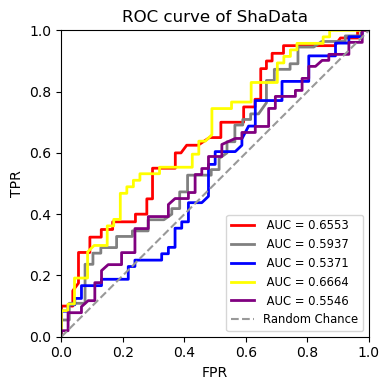

In [296]:
from sklearn.utils import shuffle
import pickle

def get_kfold_data_2(i, datasets, k=5, v=1):
    datasets = shuffle_dataset(datasets, 42*42).reset_index(drop=True)
    v = v * 10
    if k<5:
        fold_size = len(datasets) // 5
    else:
        fold_size = len(datasets) // k

    test_start = i * fold_size

    if i != k - 1 and i != 0:
        test_end = (i + 1) * fold_size
        TestSet = datasets[test_start:test_end]
        TrainSet = pd.concat([datasets[0:test_start], datasets[test_end:]])

    elif i == 0:
        test_end = fold_size
        TestSet = datasets[test_start:test_end]
        TrainSet = datasets[test_end:]

    else:
        TestSet = datasets[test_start:]
        TrainSet = datasets[0:test_start]

    return TrainSet.reset_index(drop=True), TestSet.reset_index(drop=True)

def shuffle_dataset(dataset, seed):
    np.random.seed(seed)
    dataset = shuffle(dataset)
    return dataset

kfold = 5
ACCU,SENS,PREC,F1 = [],[],[],[]
FPR = []
TPR = []
ROC_AUC = []
ROC_PRC = []
for i_fold in range(kfold):
    train_df, valid_df = get_kfold_data_2(i_fold, newTD, kfold)
    Colors = ['red','gray','blue','yellow','purple']
    y_test = valid_df.loc[:,'y']
    y_pred = valid_df.loc[:,'siRNAPred']
    accu = np.mean(y_pred == y_test)
    sens = sum(y_pred[y_test == 1] == 1) / sum(y_test == 1)
    prec = sum(y_pred[y_test == 1] == 1) / sum(y_pred)
    f1 = 2*sens*prec / (sens + prec)
    #print(' accu:',accu,'\n','sens:',sens,'\n','prec:',prec,'\n','f1:',f1,'\n')
    y_prob = pd.DataFrame([float(i) for i in valid_df.loc[:,'siRNAPred_prob']])
    fpr, tpr, _ = roc_curve(y_test,y_prob)
    roc_auc = auc(fpr, tpr)
    precision, recall, threshold = precision_recall_curve(y_test, y_prob)  # 计算Precision和Recall
    roc_prc = auc(recall, precision) 
    ACCU.append(accu)
    SENS.append(sens)
    PREC.append(prec)
    F1.append(f1)
    FPR.append(fpr)
    TPR.append(tpr)
    ROC_AUC.append(roc_auc)
    ROC_PRC.append(roc_prc)

plt.figure(figsize=(4,4))
for i in range(kfold):
    plt.plot(FPR[i], TPR[i], '-', color=Colors[i], label= ' AUC = {:.4f}'.format(ROC_AUC[i]), lw=2)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve of ShaData')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best',fontsize='small')
plt.tight_layout()
#plt.savefig('figure/Sha/ShaData.png')
#plt.savefig('figure/Sha/ShaData.png')
#plt.savefig('figure/Sha/ShaData.png')
# print('ACCU')
# for i in ACCU:
#     print(i)
# print('SENS')
# for i in SENS:
#     print(i)
# print('PREC')
# for i in PREC:
#     print(i)
print('F1',np.mean(F1))
for i in F1:
    print(i)
print('AUC',np.mean(ROC_AUC))
for i in ROC_AUC:
    print(i)
print('PRC',np.mean(ROC_PRC),np.std(ROC_PRC))
for i in ROC_PRC:
    print(i)
    


### siRNAPred-Takayuki

In [298]:
for i in range(TakaTD.shape[0]):
    if i % 500 == 0:
        print(i)
    if SP_taka[SP_taka['SEQUENCE'] == TakaTD.iloc[i,0]]['SCORE'].shape[0] > 0:
        TakaTD.iloc[i,-2] = int(SP_taka[SP_taka['SEQUENCE'] == TakaTD.iloc[i,0]]['SCORE'].values[0] >= 0.7)
        TakaTD.iloc[i,-1] = SP_taka[SP_taka['SEQUENCE'] == TakaTD.iloc[i,0]]['SCORE'].values[0]
    else:
        print(i)
        Taka.iloc[i,-1] = 0

0
0
1
500


F1 0.2662283732816735
0.1846153846153846
0.3098591549295775
0.3529411764705882
0.271604938271605
0.21212121212121213
AUC 0.5148203278394916
0.5216836734693877
0.4814965986394558
0.5272108843537414
0.47807341709780726
0.5656370656370657
PRC 0.2733343198350152 0.030324155275158318
0.21512052484419117
0.28304250471861087
0.2960342140587492
0.27469541662663305
0.29777893892689167


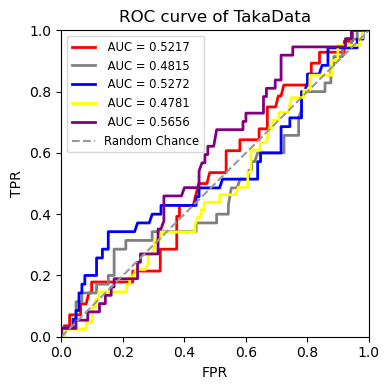

In [300]:
from sklearn.utils import shuffle
import pickle

def get_kfold_data_2(i, datasets, k=5, v=1):
    datasets = shuffle_dataset(datasets, 42).reset_index(drop=True)
    v = v * 10
    if k<5:
        fold_size = len(datasets) // 5
    else:
        fold_size = len(datasets) // k

    test_start = i * fold_size

    if i != k - 1 and i != 0:
        test_end = (i + 1) * fold_size
        TestSet = datasets[test_start:test_end]
        TrainSet = pd.concat([datasets[0:test_start], datasets[test_end:]])

    elif i == 0:
        test_end = fold_size
        TestSet = datasets[test_start:test_end]
        TrainSet = datasets[test_end:]

    else:
        TestSet = datasets[test_start:]
        TrainSet = datasets[0:test_start]

    return TrainSet.reset_index(drop=True), TestSet.reset_index(drop=True)

def shuffle_dataset(dataset, seed):
    np.random.seed(seed)
    dataset = shuffle(dataset)
    return dataset

kfold = 5
ACCU,SENS,PREC,F1 = [],[],[],[]
FPR = []
TPR = []
ROC_AUC = []
ROC_PRC = []
for i_fold in range(kfold):
    train_df, valid_df = get_kfold_data_2(i_fold, TakaTD, kfold)
    Colors = ['red','gray','blue','yellow','purple']
    y_test = valid_df.loc[:,'y']
    y_pred = valid_df.loc[:,'siRNAPred']
    accu = np.mean(y_pred == y_test)
    sens = sum(y_pred[y_test == 1] == 1) / sum(y_test == 1)
    prec = sum(y_pred[y_test == 1] == 1) / sum(y_pred)
    f1 = 2*sens*prec / (sens + prec)
    #print(' accu:',accu,'\n','sens:',sens,'\n','prec:',prec,'\n','f1:',f1,'\n')
    y_prob = pd.DataFrame([float(i) for i in valid_df.loc[:,'siRNAPred_prob']])
    fpr, tpr, _ = roc_curve(y_test,y_prob)
    roc_auc = auc(fpr, tpr)
    precision, recall, threshold = precision_recall_curve(y_test, y_prob)  # 计算Precision和Recall
    roc_prc = auc(recall, precision) 
    ACCU.append(accu)
    SENS.append(sens)
    PREC.append(prec)
    F1.append(f1)
    FPR.append(fpr)
    TPR.append(tpr)
    ROC_AUC.append(roc_auc)
    ROC_PRC.append(roc_prc)


plt.figure(figsize=(4,4))
for i in range(kfold):
    plt.plot(FPR[i], TPR[i], '-', color=Colors[i], label= ' AUC = {:.4f}'.format(ROC_AUC[i]), lw=2)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve of TakaData')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best',fontsize='small')
plt.tight_layout()
#plt.savefig('figure/Sha/ShaData.png')
#plt.savefig('figure/Sha/ShaData.png')
# print('ACCU')
# for i in ACCU:
#     print(i)
# print('SENS')
# for i in SENS:
#     print(i)
# print('PREC')
# for i in PREC:
#     print(i)
print('F1',np.mean(F1))
for i in F1:
    print(i)
print('AUC',np.mean(ROC_AUC))
for i in ROC_AUC:
    print(i)
print('PRC',np.mean(ROC_PRC),np.std(ROC_PRC))
for i in ROC_PRC:
    print(i)
    
